<a href="https://colab.research.google.com/github/masaki0914/data_analysis_100knocks/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90100%E6%9C%AC%E3%83%8E%E3%83%83%E3%82%AF_%E7%AC%AC3%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3章 顧客の全体像を把握する１０本ノック

##データを読み込む

In [1]:
import pandas as pd
uselog = pd.read_csv("use_log.csv")
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [2]:
customer = pd.read_csv("customer_master.csv")
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [3]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,オールタイム,10500
1,C02,デイタイム,7500
2,C03,ナイト,6000


In [4]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,通常
1,CA2,入会費半額
2,CA3,入会費無料


##顧客データを整形

In [5]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,ナイト,6000,通常


In [6]:
print(len(customer))
print(len(customer_join))

4192
4192


In [7]:
customer_join.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


##顧客データの基礎集計

In [8]:
customer_join.groupby("class_name").count()["customer_id"]

,customer_id
class_name,
オールタイム,2045
デイタイム,1019
ナイト,1128


In [9]:
customer_join.groupby("campaign_name").count()["customer_id"]

,customer_id
campaign_name,
入会費半額,650
入会費無料,492
通常,3050


In [10]:
customer_join.groupby("gender").count()["customer_id"]

,customer_id
gender,
F,1983
M,2209


In [11]:
customer_join.groupby("is_deleted").count()["customer_id"]

,customer_id
is_deleted,
0,2842
1,1350


In [12]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"]>pd.to_datetime("20180401")]
print(len(customer_start))

1361


##最新顧客データの基礎集計

In [13]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"]>=pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


<DatetimeArray>
['NaT', '2019-03-31 00:00:00']
Length: 2, dtype: datetime64[ns]

In [14]:
customer_newer.groupby("class_name").count()["customer_id"]

,customer_id
class_name,
オールタイム,1444
デイタイム,696
ナイト,813


In [15]:
customer_newer.groupby("campaign_name").count()["customer_id"]

,customer_id
campaign_name,
入会費半額,311
入会費無料,242
通常,2400


In [16]:
customer_newer.groupby("gender").count()["customer_id"]

,customer_id
gender,
F,1400
M,1553


##利用履歴データを集計

In [17]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["年月"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["年月","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,年月,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [19]:
!python --version

Python 3.12.12


In [20]:
uselog_customer = uselog_months.groupby("customer_id")["count"].agg(["mean", "median", "max", "min"])
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


##利用履歴データから定期利用フラグを作成

In [21]:
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id","年月","weekday"], as_index=False).count()[["customer_id","年月","weekday","log_id"]]
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [22]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id", "count"]]
uselog_weekday["routine_flag"] = 0
uselog_weekday["routine_flag"] = uselog_weekday["routine_flag"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,count,routine_flag
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


##顧客データと利用履歴データを結合

In [24]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flag"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean_x,median_x,max_x,min_x,mean_y,median_y,max_y,min_y,routine_flag
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,8,2,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,7,3,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,6,3,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,7,2,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,6,1,3.916667,4.0,6,1,1


In [25]:
customer_join.isnull().sum()

,0
customer_id,0
name,0
class,0
gender,0
start_date,0
end_date,2842
campaign_id,0
is_deleted,0
class_name,0
price,0


##会員期間を計算

In [27]:
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = 0
for i in range(len(customer_join)):
  delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
  customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
customer_join.head()

ストリーミング出力は最後の 5000 行に切り捨てられました。
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
/tmp/ipython-input-2900470653.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
/tmp/ipython-input-2900470653.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,...,median_x,max_x,min_x,mean_y,median_y,max_y,min_y,routine_flag,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,...,5.0,8,2,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,...,5.0,7,3,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,...,5.0,6,3,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,...,4.5,7,2,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,...,4.0,6,1,3.916667,4.0,6,1,1,2019-04-30,47


##顧客行動の各種統計量

In [29]:
customer_join[["mean_x", "median_x", "max_x", "min_x"]].describe()

,mean_x,median_x,max_x,min_x
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [31]:
customer_join.groupby("routine_flag").count()["customer_id"]

,customer_id
routine_flag,
0,779
1,3413


(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

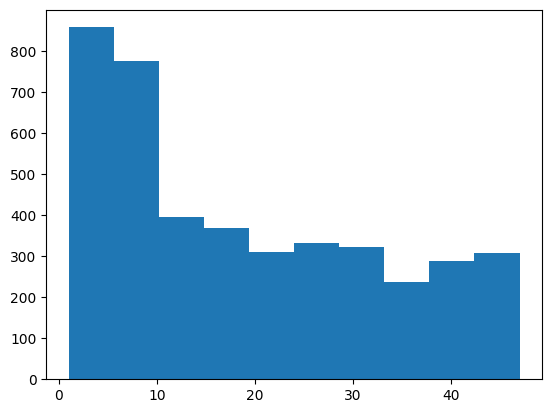

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

##退会ユーザーと継続ユーザーの違いを把握

In [33]:
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,start_date,end_date,is_deleted,price,mean_x,median_x,max_x,min_x,mean_y,median_y,max_y,min_y,routine_flag,calc_date,membership_period
count,1350,1350,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350,1350.000000
mean,2018-01-20 10:45:20,2018-10-17 16:23:28,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,3.865474,3.621852,6.461481,1.821481,0.456296,2018-10-17 16:23:28,8.026667
min,2016-05-01 00:00:00,2018-04-30 00:00:00,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2018-04-30 00:00:00,1.000000
25%,2017-10-01 00:00:00,2018-06-30 00:00:00,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,3.000000,3.000000,4.000000,1.000000,0.000000,2018-06-30 00:00:00,4.000000
50%,2018-03-01 00:00:00,2018-10-31 00:00:00,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,4.000000,4.000000,7.000000,2.000000,0.000000,2018-10-31 00:00:00,7.000000
75%,2018-06-03 00:00:00,2019-01-31 00:00:00,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,4.666667,4.500000,8.000000,2.000000,1.000000,2019-01-31 00:00:00,11.000000
max,2019-02-11 00:00:00,2019-03-31 00:00:00,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,9.000000,9.000000,13.000000,8.000000,1.000000,2019-03-31 00:00:00,23.000000
std,NaN,NaN,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,1.246385,1.270847,2.584021,0.976361,0.498271,NaN,5.033692


In [34]:
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,start_date,end_date,is_deleted,price,mean_x,median_x,max_x,min_x,mean_y,median_y,max_y,min_y,routine_flag,calc_date,membership_period
count,2842,0,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842,2842.000000
mean,2017-04-03 22:42:28.627726848,NaT,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,6.030288,6.024279,8.471147,3.620690,0.984166,2019-04-30 00:00:00,23.970443
min,2015-05-01 00:00:00,NaT,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,3.166667,3.000000,5.000000,1.000000,0.000000,2019-04-30 00:00:00,1.000000
25%,2016-05-01 00:00:00,NaT,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,4.833333,5.000000,7.000000,2.000000,1.000000,2019-04-30 00:00:00,12.000000
50%,2017-04-01 00:00:00,NaT,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,5.583333,5.500000,8.000000,3.000000,1.000000,2019-04-30 00:00:00,24.000000
75%,2018-04-05 00:00:00,NaT,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,7.178030,7.000000,10.000000,5.000000,1.000000,2019-04-30 00:00:00,35.000000
max,2019-03-15 00:00:00,NaT,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,12.000000,12.000000,14.000000,12.000000,1.000000,2019-04-30 00:00:00,47.000000
std,NaN,NaN,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,1.553587,1.599765,1.571048,2.030488,0.124855,NaN,13.746761


In [35]:
customer_join.to_csv("customer_join.csv", index=False)